In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

df = pd.read_csv('payment_fraud.csv')

print(df.head())
print(df.info())

   accountAgeDays  numItems  localTime paymentMethod  paymentMethodAgeDays  \
0              29         1   4.745402        paypal             28.204861   
1             725         1   4.742303   storecredit              0.000000   
2             845         1   4.921318    creditcard              0.000000   
3             503         1   4.886641    creditcard              0.000000   
4            2000         1   5.040929    creditcard              0.000000   

      Category  isWeekend  label  
0     shopping        0.0      0  
1  electronics        0.0      0  
2         food        1.0      0  
3  electronics        1.0      0  
4     shopping        0.0      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   loca

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
# One-hot encode 'paymentMethod', 'Category'
df_encoded = pd.get_dummies(df, columns=["paymentMethod", "Category"], drop_first=True)

# Features and target
X = df_encoded.drop("label", axis=1)
y = df_encoded["label"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[7733    0]
 [   0  112]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7733
           1       1.00      1.00      1.00       112

    accuracy                           1.00      7845
   macro avg       1.00      1.00      1.00      7845
weighted avg       1.00      1.00      1.00      7845



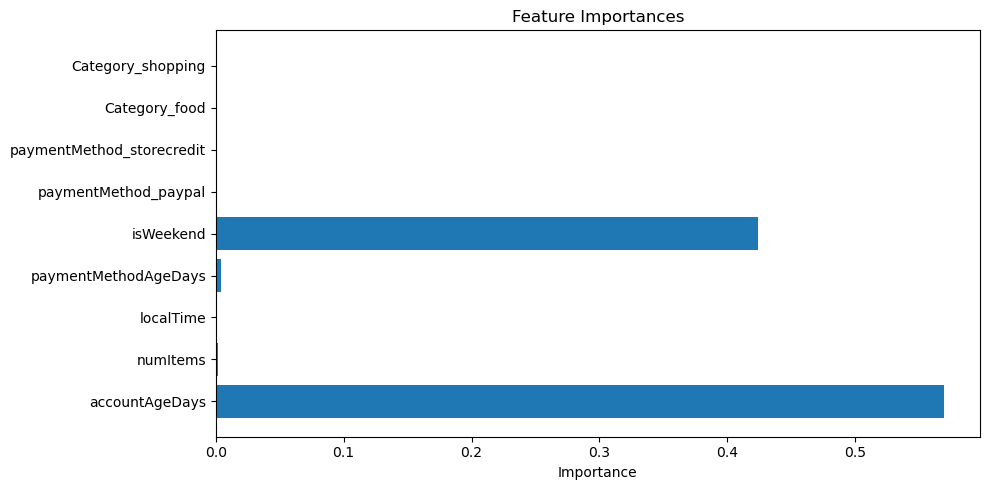

In [11]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()